In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
master = pd.read_csv("../data/master/studytime.csv")
master["day of week"] = pd.Categorical(master["day of week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
master.head(25)

,term,week,day of week,class,time spent (min)
0,fa23,5,Monday,PHYS 214,0.0
1,fa23,5,Monday,MATH 241,60.0
2,fa23,5,Monday,LAS 101,0.0
3,fa23,5,Monday,STAT 107,0.0
4,fa23,5,Tuesday,LAS 101,0.0
5,fa23,5,Tuesday,PHYS 214,15.0
6,fa23,5,Tuesday,MATH 241,0.0
7,fa23,5,Tuesday,STAT 107,0.0
8,fa23,5,Wednesday,LAS 101,0.0
9,fa23,5,Wednesday,PHYS 214,0.0


(1.0, 17.0)

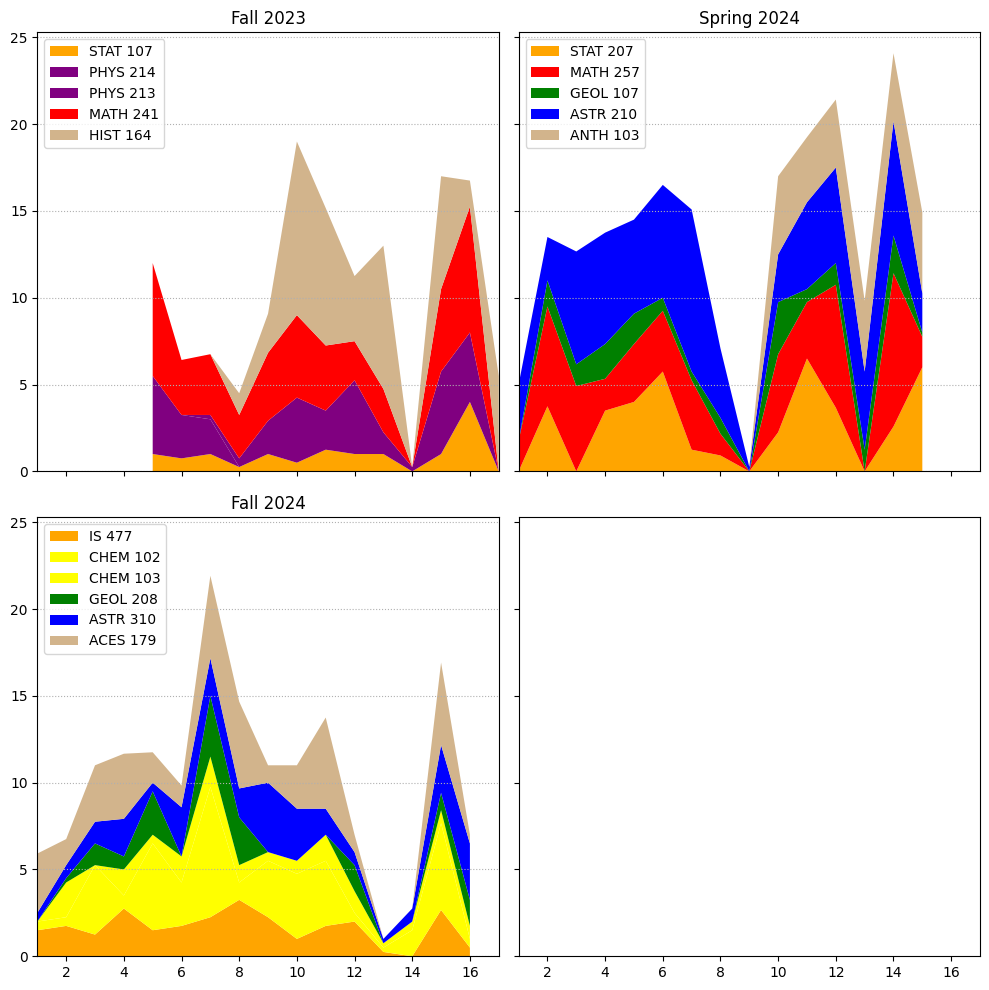

In [19]:
fig, ax = plt.subplots(2,2, figsize=[10,10], sharey=True, sharex=True)
fa23 = master[master["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = fa23.groupby(['week']).agg('sum')[["STAT 107", "PHYS 214", "PHYS 213", "MATH 241", "HIST 164"]]

ax[0,0].stackplot(df1.index, [df1[col]/60 for col in df1.columns], labels=df1.columns, colors=['orange', 'purple', 'purple', 'red', 'tan'])
# ax[0,0].set_yticklabels([int(y / 60.0) for y in ax[0,0].get_yticks()])  # Convert ticks to hours
ax[0,0].grid(axis='y', ls='dotted')
# ax[0,0].axvline(14, color='k', label="break")
ax[0,0].legend(df1.columns, loc='upper left')

sp24 = master[master["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = sp24.groupby(['week']).agg('sum')[[ "STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"]]

ax[0,1].stackplot(df1.index, [df1[col]/60 for col in df1.columns], labels=df1.columns, colors=['orange', 'red', 'green', 'blue', 'tan'])
ax[0,1].legend(df1.columns, loc='upper left')
ax[0,1].grid(axis='y', ls='dotted')

fa24 = master[master["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = fa24.groupby(['week']).agg('sum')[[ "IS 477", "CHEM 102", "CHEM 103", "GEOL 208", "ASTR 310", "ACES 179"]]

ax[1,0].stackplot(df1.index, [df1[col]/60 for col in df1.columns], labels=df1.columns, colors=['orange', 'yellow', 'yellow', 'green', 'blue', 'tan'])
ax[1,0].legend(df1.columns, loc='upper left')
ax[1,0].grid(axis='y', ls='dotted')

# fig.text(0.08, 0.5, 'minutes', va='center', rotation='vertical')
# fig.text(0.515, 0.08, 'week', ha='center', rotation='horizontal')
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
fig.align_xlabels()
ax[0,0].set_xticks(list(range(0,17,2)))
plt.tight_layout()
fig.savefig('../results/stackplot_by_class.png')
plt.xlim(1, 17)

In [20]:
fa24.head(15)

class                  ACES 179  ASTR 310  CHEM 102  CHEM 103  GEOL 208  \
term week day of week                                                     
fa24 1    Monday            0.0       0.0       0.0       0.0       0.0   
          Tuesday          90.0       0.0       0.0       0.0       0.0   
          Wednesday        55.0      15.0       0.0       0.0       0.0   
          Thursday          0.0       0.0       0.0       0.0       0.0   
          Friday            0.0       0.0      30.0       0.0       0.0   
          Saturday          0.0       0.0       0.0       0.0       0.0   
          Sunday           60.0      15.0       0.0       0.0       0.0   
     2    Monday            0.0       0.0       0.0       0.0       0.0   
          Tuesday           0.0      30.0       0.0       0.0       0.0   
          Wednesday        90.0      15.0       0.0       0.0      15.0   
          Thursday          0.0       0.0       0.0       0.0       0.0   
          Friday            0.0       0.0       0.0       0.0       0.0   
          Saturday          0.0       0.0      30.0      90.0       0.0   
          Sunday            0.0       0.0       0.0      30.0       0.0   
     3    Monday           60.0       0.0      30.0       0.0       0.0   

class                  IS 477  
term week day of week          
fa24 1    Monday          0.0  
          Tuesday         0.0  
          Wednesday      90.0  
          Thursday        0.0  
          Friday          0.0  
          Saturday        0.0  
          Sunday          0.0  
     2    Monday          0.0  
          Tuesday         0.0  
          Wednesday       0.0  
          Thursday        0.0  
          Friday          0.0  
          Saturday        0.0  
          Sunday        105.0  
     3    Monday          0.0

In [21]:
ds_group = ['STAT 107', 'STAT 207', 'IS 477']
astro_group = ['ASTR 210', 'ASTR 310']
gened_group = ['HIST 164', 'ANTH 103', 'ACES 179']
geol_group = ['GEOL 107', 'GEOL 208']
stem_foundations = ['MATH 241', 'MATH 257', 'PHYS 213', 'PHYS 214', 'CHEM 102', 'CHEM 103']

def find_group(course: str):
    if course in ds_group:
        return 'ds'
    elif course in astro_group:
        return 'astro'
    elif course in gened_group:
        return 'gened'
    elif course in geol_group:
        return 'geol'
    elif course in stem_foundations:
        return 'stem_foundations'
    else:
        return 'other'

master['group'] = master['class'].apply(lambda x: find_group(x))
df_groups = master.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['time spent (min)']].reset_index()

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_18967/1097376047.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_groups = master.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['time spent (min)']].reset_index()


(1.0, 17.0)

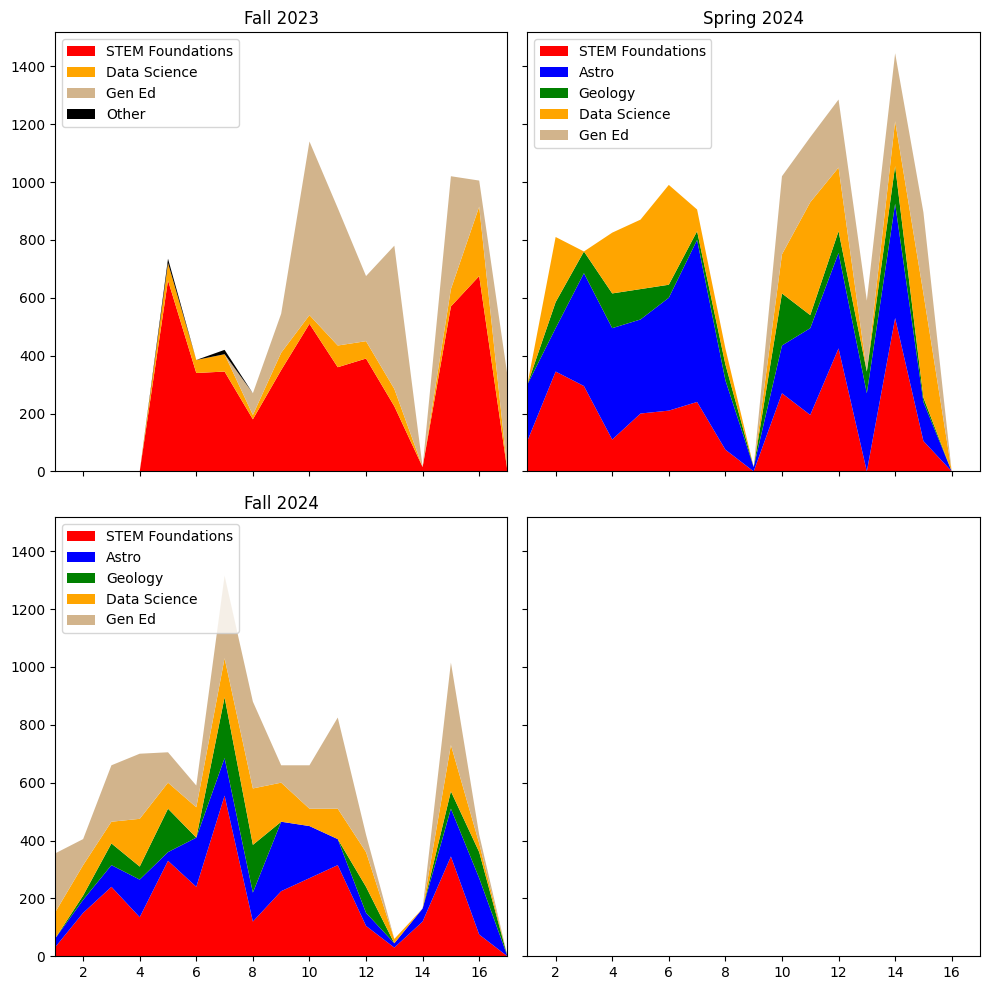

In [22]:
fig2, ax2 = plt.subplots(2,2, figsize=[10,10], sharey=True, sharex=True)

fa23 = df_groups[df_groups["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = fa23.groupby(['week']).agg('sum')[['stem_foundations', 'ds', 'gened', 'other']]

ax2[0,0].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'orange', 'tan', 'black'])
ax2[0,0].legend(labels=["STEM Foundations", "Data Science", "Gen Ed", "Other"], loc='upper left')

sp24 = df_groups[df_groups["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = sp24.groupby(['week']).agg('sum')[['stem_foundations', 'astro', 'geol', 'ds', 'gened']]

ax2[0,1].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'blue', 'green', 'orange', 'tan'])
ax2[0,1].legend(labels=["STEM Foundations", "Astro", "Geology", "Data Science", "Gen Ed"], loc='upper left')

fa24 = df_groups[df_groups["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = fa24.groupby(['week']).agg('sum')[['stem_foundations', 'astro', 'geol', 'ds', 'gened']]

ax2[1,0].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'blue', 'green', 'orange', 'tan'])
ax2[1,0].legend(labels=["STEM Foundations", "Astro", "Geology", "Data Science", "Gen Ed"], loc='upper left')

# fig2.text(0.08, 0.5, 'minutes', va='center', rotation='vertical')
# fig2.text(0.515, 0.08, 'week', ha='center', rotation='horizontal')
ax2[0,0].set_title("Fall 2023")
ax2[0,1].set_title("Spring 2024")
ax2[1,0].set_title("Fall 2024")
fig2.align_xlabels()
ax2[0,0].set_xticks(list(range(0,17,2)))
plt.tight_layout()
fig2.savefig('../results/stackplot_by_group.png')
plt.xlim(1,17)